In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ex1data1.txt', header=None, names=['Poplation', 'Profit'])

In [3]:
data

,Poplation,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


<AxesSubplot:xlabel='Poplation', ylabel='Profit'>

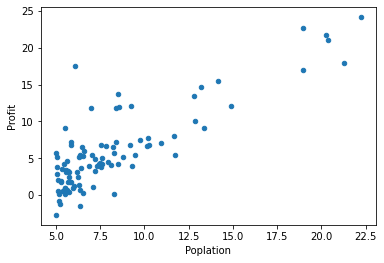

In [4]:
data.plot(kind='scatter', x='Poplation', y='Profit')

y(预测值) = X(输入)W(权重)

1. 随机初始化模型权重W
2. 输入X传进模型  得到预测值
3. (损失函数) 计算预测值Y 实际值 Y之间的差 损失J -> 均方差 MSE
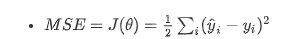

 4. 计算模型权重的损失梯度J(O)
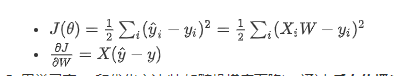

 5. 学习率a和优化方法(随机梯度下降) 反向传播方式  更新模型权重 -> 重复 模型表现最好

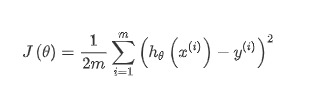

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - 2), 2)
    return np.sum(inner) / (2 * len(X))

# 计算 J  X 矩阵

In [6]:
data.head()

,Poplation,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.insert(0, 'Ones', 1)

In [8]:
data

,Ones,Poplation,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [9]:
cols = data.shape[1]
X = data.iloc[:, :-1] # 出去最后一列
y = data.iloc[:, cols-1:cols]

In [10]:
X

,Ones,Poplation
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [11]:
y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [13]:
X.shape

(97, 2)

In [14]:
y.shape

(97, 1)

In [15]:
theta.shape

(1, 2)

In [16]:
computeCost(X, y, theta)

2.0

In [17]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)
    parameters = int(theta.ravel().shape[1])
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j]) # 相乘
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term)) # 梯度下降算法
        
        theta = temp
        cost[i] = computeCost(X, y , theta)
    
    return theta, cost
    

In [18]:
alpha = 0.01
iters = 1500

In [19]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [20]:
g

matrix([[-3.63029144,  1.16636235]])

In [21]:
cost

array([ 8.905808  , 13.83791136, 14.83378829, ..., 17.63502475,
       17.6355223 , 17.63601899])

In [22]:
predict1 = [1, 3.5]*g.T # 预测 35000 和 70000 城市规模小餐厅利润
predict1

matrix([[0.45197679]])

In [23]:
predict2 = [1, 7]*g.T
predict2

matrix([[4.53424501]])

In [24]:
x = np.linspace(data.Poplation.min(), data.Poplation.max(), 100)

In [25]:
x

array([ 5.0269    ,  5.20039596,  5.37389192,  5.54738788,  5.72088384,
        5.8943798 ,  6.06787576,  6.24137172,  6.41486768,  6.58836364,
        6.7618596 ,  6.93535556,  7.10885152,  7.28234747,  7.45584343,
        7.62933939,  7.80283535,  7.97633131,  8.14982727,  8.32332323,
        8.49681919,  8.67031515,  8.84381111,  9.01730707,  9.19080303,
        9.36429899,  9.53779495,  9.71129091,  9.88478687, 10.05828283,
       10.23177879, 10.40527475, 10.57877071, 10.75226667, 10.92576263,
       11.09925859, 11.27275455, 11.44625051, 11.61974646, 11.79324242,
       11.96673838, 12.14023434, 12.3137303 , 12.48722626, 12.66072222,
       12.83421818, 13.00771414, 13.1812101 , 13.35470606, 13.52820202,
       13.70169798, 13.87519394, 14.0486899 , 14.22218586, 14.39568182,
       14.56917778, 14.74267374, 14.9161697 , 15.08966566, 15.26316162,
       15.43665758, 15.61015354, 15.78364949, 15.95714545, 16.13064141,
       16.30413737, 16.47763333, 16.65112929, 16.82462525, 16.99

In [26]:
f = g[0, 0] + (g[0, 1] * x)

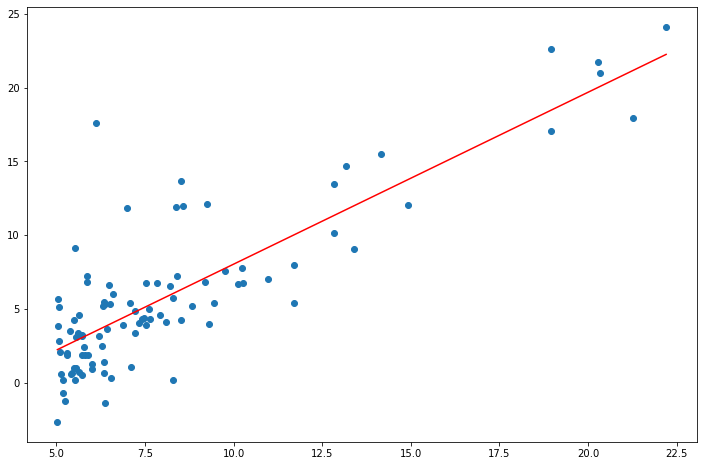

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Poplation, data.Profit, label='Traning Data')
plt.show()

In [41]:
data2 = pd.read_csv('./ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

In [29]:
# 预测房屋价格

In [42]:
data2 # 梯度下降收敛更快  每类特征减去他的平均值除以标准差

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [43]:
data2 = (data2 - data2.mean()) / data2.std()

In [44]:
data2

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [45]:
# 梯度
data2.insert(0, 'Ones', 1)

In [46]:
np.zeros((1, 2))

array([[0., 0.]])

In [48]:
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1] 
y2 = data2.iloc[:, cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

In [49]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [50]:
g2

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])

### 正规方程
    通过求解某一个方程找出使得代价函数最小的参数
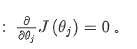

假设训练集特征矩阵为X(包含了X0 = 1) 并且我们训练集结果为向量y -> theta = (X ** T * X)  ** -1 * y

梯度:
    需要选择学习率 a(阿尔法) 多次迭代 当特征数量N大时也可以使用 各种类型的模型

正规方程:
    不需要学习率, 一次计算得出  需要计算(X ** T * X)  ** -1 特征数量N比较大的时候 运算代价大 n小于10000  -> 线性模型

In [51]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y # X.T@X X.T.dot(X)
    return theta

In [52]:
theta3 = normalEqn(X, y)

In [53]:
theta3

matrix([[-3.89578088],
        [ 1.19303364]])

In [59]:
g3, cost3 = gradientDescent(X2, y2, theta2, alpha, iters)

In [60]:
g3

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])